In [1]:
from pathlib import Path

import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    
from IPython.display import display
from PIL import Image

from tensorflow.keras import backend as K
import tensorflow as tf

2023-07-13 12:39:19.169066: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 12:39:19.385545: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 12:39:19.387081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 12:39:27.928821: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = ['MethaneAIR_L1B_CH4_20221101T181036_20221101T181106_20230328T164513',
'MethaneAIR_L1B_CH4_20221101T181106_20221101T181136_20230328T164320',
'MethaneAIR_L1B_CH4_20221101T181136_20221101T181206_20230328T164327',
'MethaneAIR_L1B_CH4_20221101T183845_20221101T183915_20230328T164410',
'MethaneAIR_L1B_CH4_20221101T183915_20221101T183945_20230328T164457',
'MethaneAIR_L1B_CH4_20221101T183945_20221101T184015_20230328T164427',
'MethaneAIR_L1B_CH4_20221101T184015_20221101T184045_20230328T164305',
'MethaneAIR_L1B_CH4_20221101T184045_20221101T184115_20230328T164534',
'MethaneAIR_L1B_CH4_20221101T184346_20221101T184416_20230328T164542',
'MethaneAIR_L1B_CH4_20221101T184416_20221101T184447_20230328T164449',
'MethaneAIR_L1B_CH4_20221101T184447_20221101T184517_20230328T164543',
'MethaneAIR_L1B_CH4_20221101T184517_20221101T184547_20230328T164425',
'MethaneAIR_L1B_CH4_20221101T184547_20221101T184617_20230328T164419',
'MethaneAIR_L1B_CH4_20221101T184617_20221101T184647_20230328T164537',
'MethaneAIR_L1B_CH4_20221101T184647_20221101T184717_20230328T164513',
'MethaneAIR_L1B_CH4_20221101T185620_20221101T185650_20230328T164459',
'MethaneAIR_L1B_CH4_20221101T185650_20221101T185721_20230328T164447',
'MethaneAIR_L1B_CH4_20221101T185721_20221101T185751_20230328T164456',
'MethaneAIR_L1B_CH4_20221101T185751_20221101T185821_20230328T164417',
'MethaneAIR_L1B_CH4_20221101T185821_20221101T185851_20230328T164324',
'MethaneAIR_L1B_CH4_20221101T190453_20221101T190523_20230328T164502',
'MethaneAIR_L1B_CH4_20221101T190523_20221101T190553_20230328T164508',
'MethaneAIR_L1B_CH4_20221101T190553_20221101T190623_20230328T164507',
'MethaneAIR_L1B_CH4_20221101T190654_20221101T190724_20230328T164445',
'MethaneAIR_L1B_CH4_20221101T190824_20221101T190854_20230328T164507',
'MethaneAIR_L1B_CH4_20221101T190854_20221101T190924_20230328T164507',
'MethaneAIR_L1B_CH4_20221101T190924_20221101T190955_20230328T164526',
'MethaneAIR_L1B_CH4_20221101T191025_20221101T191055_20230328T164500',
'MethaneAIR_L1B_CH4_20221101T191055_20221101T191125_20230328T164604',
'MethaneAIR_L1B_CH4_20221101T191125_20221101T191155_20230328T164457',
'MethaneAIR_L1B_CH4_20221101T191155_20221101T191225_20230328T164557',
'MethaneAIR_L1B_CH4_20221101T191225_20221101T191256_20230328T164457',
'MethaneAIR_L1B_CH4_20221101T191256_20221101T191326_20230328T164505',
'MethaneAIR_L1B_CH4_20221101T191326_20221101T191356_20230328T164512',
'MethaneAIR_L1B_CH4_20221101T191356_20221101T191426_20230328T164610',
'MethaneAIR_L1B_CH4_20221101T191426_20221101T191456_20230328T164518',
'MethaneAIR_L1B_CH4_20221101T192228_20221101T192259_20230328T164520',
'MethaneAIR_L1B_CH4_20221101T192329_20221101T192359_20230328T164631',
'MethaneAIR_L1B_CH4_20221101T192359_20221101T192429_20230328T164540',
'MethaneAIR_L1B_CH4_20221101T192429_20221101T192459_20230328T164548',
'MethaneAIR_L1B_CH4_20221101T192459_20221101T192529_20230328T164540',
'MethaneAIR_L1B_CH4_20221101T192529_20221101T192559_20230328T164557',
'MethaneAIR_L1B_CH4_20221101T192600_20221101T192630_20230328T164539',
'MethaneAIR_L1B_CH4_20221101T193131_20221101T193201_20230328T164453',
'MethaneAIR_L1B_CH4_20221101T193232_20221101T193302_20230328T164556',
'MethaneAIR_L1B_CH4_20221101T193332_20221101T193402_20230328T164541',
'MethaneAIR_L1B_CH4_20221101T193633_20221101T193703_20230328T164438',
'MethaneAIR_L1B_CH4_20221101T193703_20221101T193733_20230328T164432',
'MethaneAIR_L1B_CH4_20221101T193803_20221101T193834_20230328T164435',
'MethaneAIR_L1B_CH4_20221101T193834_20221101T193904_20230328T164438',
'MethaneAIR_L1B_CH4_20221101T193904_20221101T193934_20230328T164501',
'MethaneAIR_L1B_CH4_20221101T194034_20221101T194104_20230328T164506',
'MethaneAIR_L1B_CH4_20221101T194205_20221101T194235_20230328T164556',
'MethaneAIR_L1B_CH4_20221101T194235_20221101T194305_20230328T164521',
'MethaneAIR_L1B_CH4_20221101T194305_20221101T194335_20230328T164602',
'MethaneAIR_L1B_CH4_20221101T194335_20221101T194405_20230328T164450',
'MethaneAIR_L1B_CH4_20221101T194405_20221101T194435_20230328T164450',
'MethaneAIR_L1B_CH4_20221101T194436_20221101T194506_20230328T164605',
'MethaneAIR_L1B_CH4_20221101T194506_20221101T194536_20230328T164445',
'MethaneAIR_L1B_CH4_20221101T194907_20221101T194937_20230328T164529',
'MethaneAIR_L1B_CH4_20221101T194937_20221101T195007_20230328T164634',
'MethaneAIR_L1B_CH4_20221101T195007_20221101T195037_20230328T164458',
'MethaneAIR_L1B_CH4_20221101T195037_20221101T195108_20230328T164500',
'MethaneAIR_L1B_CH4_20221101T195108_20221101T195138_20230328T164626',
'MethaneAIR_L1B_CH4_20221101T195138_20221101T195208_20230328T164642',
'MethaneAIR_L1B_CH4_20221101T195208_20221101T195238_20230328T164457',
'MethaneAIR_L1B_CH4_20221101T195238_20221101T195308_20230328T164451',
'MethaneAIR_L1B_CH4_20221101T195308_20221101T195338_20230328T164630',
'MethaneAIR_L1B_CH4_20221101T195338_20221101T195408_20230328T164622',
'MethaneAIR_L1B_CH4_20221101T195639_20221101T195709_20230328T164641',
'MethaneAIR_L1B_CH4_20221101T195710_20221101T195740_20230328T164501',
'MethaneAIR_L1B_CH4_20221101T195910_20221101T195940_20230328T164509',
'MethaneAIR_L1B_CH4_20221101T200141_20221101T200211_20230328T164528',
'MethaneAIR_L1B_CH4_20221101T200241_20221101T200311_20230328T164530',
'MethaneAIR_L1B_CH4_20221101T200311_20221101T200342_20230328T164634',
'MethaneAIR_L1B_CH4_20221101T200442_20221101T200512_20230328T164625',
'MethaneAIR_L1B_CH4_20221101T200512_20221101T200542_20230328T164521',
'MethaneAIR_L1B_CH4_20221101T200542_20221101T200612_20230328T164530',
'MethaneAIR_L1B_CH4_20221101T200612_20221101T200642_20230328T164635',
'MethaneAIR_L1B_CH4_20221101T200643_20221101T200713_20230328T164548',
'MethaneAIR_L1B_CH4_20221101T200713_20221101T200743_20230328T164650',
'MethaneAIR_L1B_CH4_20221101T200743_20221101T200813_20230328T164546',
'MethaneAIR_L1B_CH4_20221101T200813_20221101T200843_20230328T164536',
'MethaneAIR_L1B_CH4_20221101T200843_20221101T200913_20230328T164544',
'MethaneAIR_L1B_CH4_20221101T200944_20221101T201014_20230328T164535',
'MethaneAIR_L1B_CH4_20221101T201014_20221101T201044_20230328T164532',
'MethaneAIR_L1B_CH4_20221101T201315_20221101T201345_20230328T164533',
'MethaneAIR_L1B_CH4_20221101T201345_20221101T201415_20230328T164533',
'MethaneAIR_L1B_CH4_20221101T201716_20221101T201746_20230328T164541',
'MethaneAIR_L1B_CH4_20221101T201846_20221101T201917_20230328T164544',
'MethaneAIR_L1B_CH4_20221101T201917_20221101T201947_20230328T164548',
'MethaneAIR_L1B_CH4_20221101T201947_20221101T202017_20230328T164543',
'MethaneAIR_L1B_CH4_20221101T202117_20221101T202147_20230328T164552',
'MethaneAIR_L1B_CH4_20221101T202147_20221101T202217_20230328T164705',
'MethaneAIR_L1B_CH4_20221101T202318_20221101T202348_20230328T164546',
'MethaneAIR_L1B_CH4_20221101T202348_20221101T202418_20230328T164548',
'MethaneAIR_L1B_CH4_20221101T202448_20221101T202518_20230328T164549',
'MethaneAIR_L1B_CH4_20221101T202518_20221101T202549_20230328T164557',
'MethaneAIR_L1B_CH4_20221101T202549_20221101T202619_20230328T164553',
'MethaneAIR_L1B_CH4_20221101T202619_20221101T202649_20230328T164559',
'MethaneAIR_L1B_CH4_20221101T155151_20221101T155222_20230328T163931',
'MethaneAIR_L1B_CH4_20221101T155322_20221101T155352_20230328T163952',
'MethaneAIR_L1B_CH4_20221101T155422_20221101T155452_20230328T163933',
'MethaneAIR_L1B_CH4_20221101T155523_20221101T155553_20230328T164231',
'MethaneAIR_L1B_CH4_20221101T155523_20221101T155553_20230328T164231',
'MethaneAIR_L1B_CH4_20221101T155553_20221101T155623_20230328T164030',
'MethaneAIR_L1B_CH4_20221101T155553_20221101T155623_20230328T164030',
'MethaneAIR_L1B_CH4_20221101T155623_20221101T155653_20230328T164301',
'MethaneAIR_L1B_CH4_20221101T155623_20221101T155653_20230328T164301',
'MethaneAIR_L1B_CH4_20221101T155653_20221101T155723_20230328T164309',
'MethaneAIR_L1B_CH4_20221101T155854_20221101T155924_20230328T164146',
'MethaneAIR_L1B_CH4_20221101T160155_20221101T160225_20230328T164205',
'MethaneAIR_L1B_CH4_20221101T160325_20221101T160355_20230328T164031',
'MethaneAIR_L1B_CH4_20221101T160325_20221101T160355_20230328T164031',
'MethaneAIR_L1B_CH4_20221101T160355_20221101T160425_20230328T164029',
'MethaneAIR_L1B_CH4_20221101T160556_20221101T160626_20230328T164332',
'MethaneAIR_L1B_CH4_20221101T160727_20221101T160757_20230328T164309',
'MethaneAIR_L1B_CH4_20221101T160757_20221101T160827_20230328T164344',
'MethaneAIR_L1B_CH4_20221101T160757_20221101T160827_20230328T164344',
'MethaneAIR_L1B_CH4_20221101T160827_20221101T160857_20230328T164109',
'MethaneAIR_L1B_CH4_20221101T160827_20221101T160857_20230328T164109',
'MethaneAIR_L1B_CH4_20221101T160857_20221101T160927_20230328T164037',
'MethaneAIR_L1B_CH4_20221101T160857_20221101T160927_20230328T164037',
'MethaneAIR_L1B_CH4_20221101T160927_20221101T160957_20230328T164109',
'MethaneAIR_L1B_CH4_20221101T160927_20221101T160957_20230328T164109',
'MethaneAIR_L1B_CH4_20221101T161028_20221101T161058_20230328T164356',
'MethaneAIR_L1B_CH4_20221101T161028_20221101T161058_20230328T164356',
'MethaneAIR_L1B_CH4_20221101T161228_20221101T161258_20230328T164227',
'MethaneAIR_L1B_CH4_20221101T161429_20221101T161459_20230328T164612',
'MethaneAIR_L1B_CH4_20221101T161629_20221101T161659_20230328T164345',
'MethaneAIR_L1B_CH4_20221101T161730_20221101T161800_20230328T164559',
'MethaneAIR_L1B_CH4_20221101T161800_20221101T161830_20230328T164446',
'MethaneAIR_L1B_CH4_20221101T161800_20221101T161830_20230328T164446',
'MethaneAIR_L1B_CH4_20221101T161900_20221101T161930_20230328T164405',
'MethaneAIR_L1B_CH4_20221101T161930_20221101T162000_20230328T164515',
'MethaneAIR_L1B_CH4_20221101T162001_20221101T162031_20230328T164453',
'MethaneAIR_L1B_CH4_20221101T162001_20221101T162031_20230328T164453',
'MethaneAIR_L1B_CH4_20221101T162201_20221101T162231_20230328T164150',
'MethaneAIR_L1B_CH4_20221101T162302_20221101T162332_20230328T164204',
'MethaneAIR_L1B_CH4_20221101T162332_20221101T162402_20230328T164045',
'MethaneAIR_L1B_CH4_20221101T162402_20221101T162432_20230328T164202',
'MethaneAIR_L1B_CH4_20221101T162402_20221101T162432_20230328T164202',
'MethaneAIR_L1B_CH4_20221101T162432_20221101T162502_20230328T164201',
'MethaneAIR_L1B_CH4_20221101T162432_20221101T162502_20230328T164201',
'MethaneAIR_L1B_CH4_20221101T162803_20221101T162833_20230328T164349',
'MethaneAIR_L1B_CH4_20221101T162833_20221101T162903_20230328T164223',
'MethaneAIR_L1B_CH4_20221101T163004_20221101T163034_20230328T164057',
'MethaneAIR_L1B_CH4_20221101T163004_20221101T163034_20230328T164057',
'MethaneAIR_L1B_CH4_20221101T163134_20221101T163204_20230328T164045',
'MethaneAIR_L1B_CH4_20221101T164037_20221101T164107_20230328T164054',
'MethaneAIR_L1B_CH4_20221101T164037_20221101T164107_20230328T164054',
'MethaneAIR_L1B_CH4_20221101T164137_20221101T164208_20230328T164108',
'MethaneAIR_L1B_CH4_20221101T170746_20221101T170816_20230328T164223',
'MethaneAIR_L1B_CH4_20221101T170846_20221101T170916_20230328T164239',
'MethaneAIR_L1B_CH4_20221101T173454_20221101T173524_20230328T164232',
'MethaneAIR_L1B_CH4_20221101T173454_20221101T173524_20230328T164232',
'MethaneAIR_L1B_CH4_20221101T173525_20221101T173555_20230328T164231',
'MethaneAIR_L1B_CH4_20221101T173525_20221101T173555_20230328T164231',
'MethaneAIR_L1B_CH4_20221101T173555_20221101T173625_20230328T164232',
'MethaneAIR_L1B_CH4_20221101T180203_20221101T180233_20230328T164350',
'MethaneAIR_L1B_CH4_20221101T180203_20221101T180233_20230328T164350',
'MethaneAIR_L1B_CH4_20221101T180233_20221101T180303_20230328T164600',
'MethaneAIR_L1B_CH4_20221101T180303_20221101T180333_20230328T164312',
'MethaneAIR_L1B_CH4_20221101T180303_20221101T180333_20230328T164312',
'MethaneAIR_L1B_CH4_20221101T180333_20221101T180403_20230328T164322',
'MethaneAIR_L1B_CH4_20221101T180333_20221101T180403_20230328T164322',
'MethaneAIR_L1B_CH4_20221101T182942_20221101T183012_20230328T164408',
'MethaneAIR_L1B_CH4_20221101T182942_20221101T183012_20230328T164408',
'MethaneAIR_L1B_CH4_20221101T183012_20221101T183042_20230328T164542',
'MethaneAIR_L1B_CH4_20221101T183012_20221101T183042_20230328T164542',
'MethaneAIR_L1B_CH4_20221101T183042_20221101T183112_20230328T164538',
'MethaneAIR_L1B_CH4_20221101T183243_20221101T183313_20230328T164518',
'MethaneAIR_L1B_CH4_20221101T185550_20221101T185620_20230328T164452',
'MethaneAIR_L1B_CH4_20221101T185851_20221101T185921_20230328T164458',
'MethaneAIR_L1B_CH4_20221101T185921_20221101T185951_20230328T164447',
'MethaneAIR_L1B_CH4_20221101T192028_20221101T192058_20230328T164556',
'MethaneAIR_L1B_CH4_20221101T192259_20221101T192329_20230328T164530',
'MethaneAIR_L1B_CH4_20221101T192630_20221101T192700_20230328T164531',
'MethaneAIR_L1B_CH4_20221101T194736_20221101T194807_20230328T164606',
'MethaneAIR_L1B_CH4_20221101T201044_20221101T201114_20230328T164529',
'MethaneAIR_L1B_CH4_20221101T201044_20221101T201114_20230328T164529',
'MethaneAIR_L1B_CH4_20221101T201114_20221101T201144_20230328T164531',
'MethaneAIR_L1B_CH4_20221101T201114_20221101T201144_20230328T164531',
'MethaneAIR_L1B_CH4_20221101T201214_20221101T201244_20230328T164532',
'MethaneAIR_L1B_CH4_20221101T201214_20221101T201244_20230328T164532',
'MethaneAIR_L1B_CH4_20221101T201245_20221101T201315_20230328T164531',
'MethaneAIR_L1B_CH4_20221101T201245_20221101T201315_20230328T164531',
'MethaneAIR_L1B_CH4_20221101T201415_20221101T201445_20230328T164532',
'MethaneAIR_L1B_CH4_20221101T201415_20221101T201445_20230328T164532',
'MethaneAIR_L1B_CH4_20221101T201445_20221101T201515_20230328T164530',
'MethaneAIR_L1B_CH4_20221101T201445_20221101T201515_20230328T164530',
'MethaneAIR_L1B_CH4_20221101T201515_20221101T201545_20230328T164535',
'MethaneAIR_L1B_CH4_20221101T201515_20221101T201545_20230328T164535',
'MethaneAIR_L1B_CH4_20221101T201545_20221101T201616_20230328T164536',
'MethaneAIR_L1B_CH4_20221101T201545_20221101T201616_20230328T164536',
'MethaneAIR_L1B_CH4_20221101T202017_20221101T202047_20230328T164544',
'MethaneAIR_L1B_CH4_20221101T202017_20221101T202047_20230328T164544',
'MethaneAIR_L1B_CH4_20221101T202047_20221101T202117_20230328T164535',
'MethaneAIR_L1B_CH4_20221101T202047_20221101T202117_20230328T164535',
'MethaneAIR_L1B_CH4_20221101T202217_20221101T202248_20230328T164736',
'MethaneAIR_L1B_CH4_20221101T202217_20221101T202248_20230328T164736',
'MethaneAIR_L1B_CH4_20221101T202248_20221101T202318_20230328T164658',
'MethaneAIR_L1B_CH4_20221101T202248_20221101T202318_20230328T164658',
'MethaneAIR_L1B_CH4_20221101T202719_20221101T202749_20230328T164559',
'MethaneAIR_L1B_CH4_20221101T203251_20221101T203321_20230328T164558',
'MethaneAIR_L1B_CH4_20221101T203251_20221101T203321_20230328T164558',
'MethaneAIR_L1B_CH4_20221101T203421_20221101T203451_20230328T164606',
'MethaneAIR_L1B_CH4_20221101T203451_20221101T203521_20230328T164733']

In [3]:
experiment = ['MethaneSAT_log_1', 'MethaneSAT_Cl_0.5_log_1', 'MethaneSAT_Cl_0.99_log_1',
              'MethaneSAT_Sh_0.5_log_1', 'MethaneSAT_Sh_0.09_log_1', 'MethaneSAT_cloudy_200k_log_1',
              'MethaneSAT_cl01_sh05_log_1', 'MethaneSAT_cl05_sh05_log_1', 'MethaneSAT_balanced_log_1',
              'MethaneSAT_balanced_inv_jac_log_1', 'MethaneSAT_balanced_norm_ce_log_1', 'ensemble1_cv_log_1', 'ensemble1_aufl_log_1']
# experiment = 'MethaneSAT_Cl_0.5_log_1'
# experiment = 'MethaneSAT_Cl_0.99_log_1'
# experiment = 'MethaneSAT_Sh_0.5_log_1'
# experiment = 'MethaneSAT_Sh_0.09_log_1'
data = []
for i, file in enumerate(experiment):
    logs = Path().cwd().parent.joinpath('Cloud-Net', file + '.log')
    df = pd.read_csv(logs)
    df.rename(columns={'val_loss' : 'val_loss_' + str(i)}, inplace=True)
    
    data.append(df[['epoch','val_loss_' + str(i)]])


val_loss = pd.concat([data[0], 
                      data[1]['val_loss_1'], 
                      data[2]['val_loss_2'], 
                      data[3]['val_loss_3'], 
                      data[4]['val_loss_4'],
                      data[5]['val_loss_5'],
                      data[6]['val_loss_6'],
                      data[7]['val_loss_7'],
                      data[8]['val_loss_8'],
                      data[9]['val_loss_9'],
                      data[10]['val_loss_10'],
                      data[11]['val_loss_11'],
                     data[12]['val_loss_12']], axis=1)
    
display(val_loss)

,epoch,val_loss_0,val_loss_1,val_loss_2,val_loss_3,val_loss_4,val_loss_5,val_loss_6,val_loss_7,val_loss_8,val_loss_9,val_loss_10,val_loss_11,val_loss_12
0,0.0,0.997228,0.959236,0.956232,0.950450,0.973473,0.964916,0.908803,0.911103,0.918157,0.923946,0.919864,0.994124,0.544187
1,1.0,0.999883,0.986808,0.983169,0.973686,0.996237,0.987324,0.917956,0.918002,0.946048,0.966434,0.964290,0.999960,0.551650
2,2.0,0.978962,0.998340,0.995539,0.988074,0.988631,0.997343,0.933168,0.927567,0.969517,0.994742,0.995336,0.987477,0.649699
3,3.0,0.685073,0.999568,0.998448,0.997944,0.997862,0.995467,0.948734,0.939522,0.981117,0.997016,0.999728,0.899933,0.827962
4,4.0,0.673918,0.999781,0.999405,0.995132,0.998188,0.999449,0.961875,0.956360,0.991675,0.996963,0.999404,0.826681,0.639818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,NaN,NaN,NaN,0.428880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,NaN,NaN,NaN,0.428824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,NaN,NaN,NaN,0.428761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,NaN,NaN,NaN,0.428472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


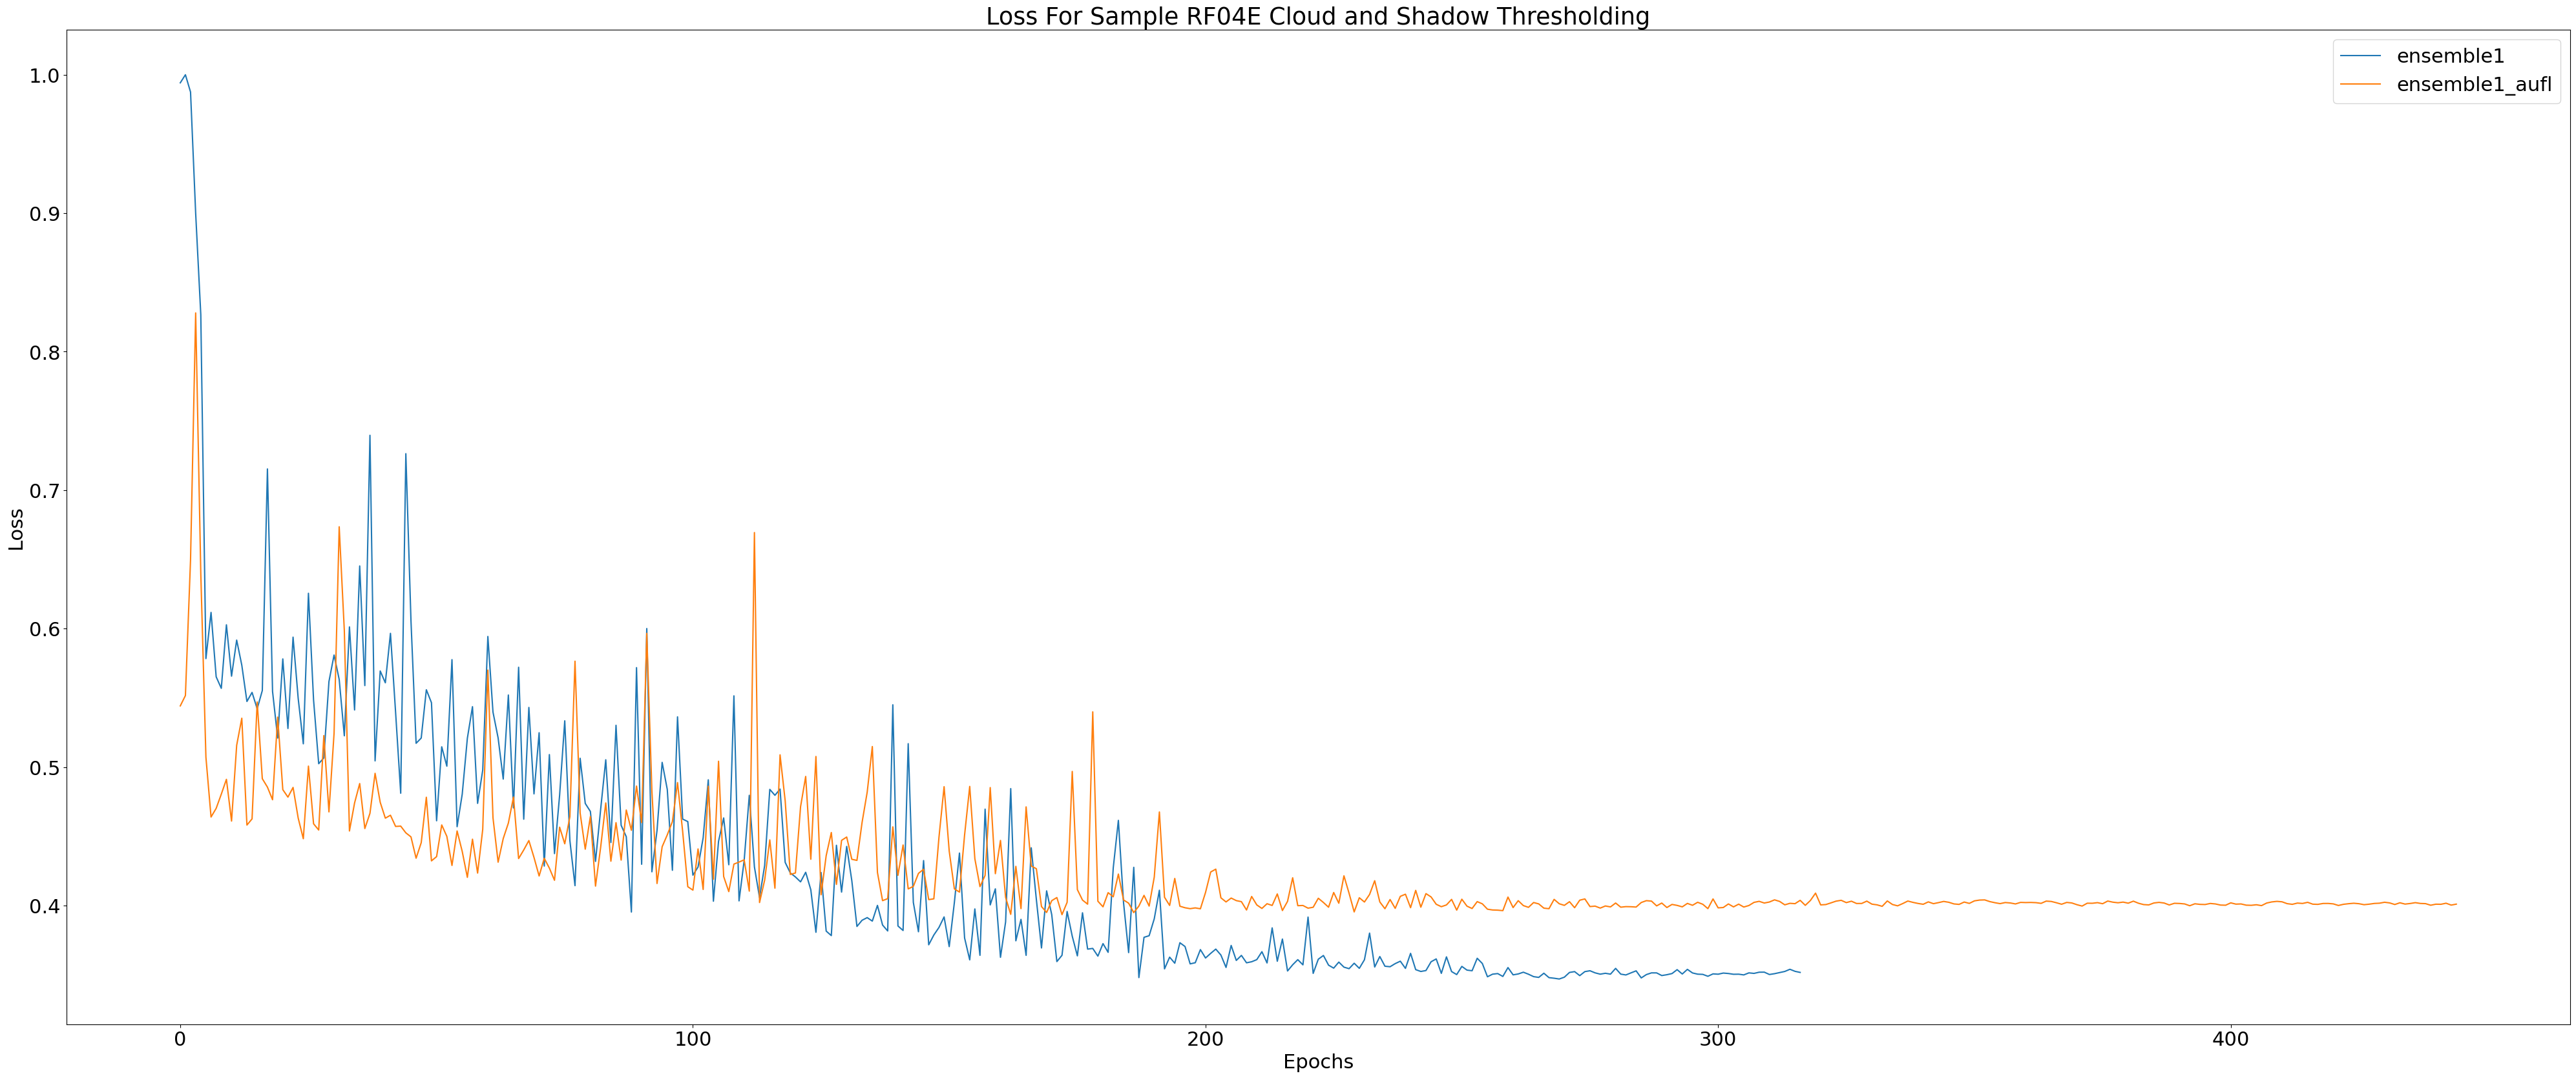

In [7]:
plt.figure(figsize=(50,20))
plt.rcParams.update({'font.size': 22})
# plt.plot(val_loss['epoch'], val_loss['val_loss_0'],
#          val_loss['epoch'], val_loss['val_loss_1'],
#         val_loss['epoch'], val_loss['val_loss_2'],
#         val_loss['epoch'], val_loss['val_loss_3'],
#         val_loss['epoch'], val_loss['val_loss_4'],
#         val_loss['epoch'], val_loss['val_loss_5'],
#         val_loss['epoch'], val_loss['val_loss_6'],
#         val_loss['epoch'], val_loss['val_loss_7'],
#         val_loss['epoch'], val_loss['val_loss_8'],
#         val_loss['epoch'], val_loss['val_loss_9'],
#         val_loss['epoch'], val_loss['val_loss_10'],
#         val_loss['epoch'], val_loss['val_loss_11'],
#         val_loss['epoch'], val_loss['val_loss_12'])
# plt.legend(['cloud=0.2, shadow=0.99', 'cloud=0.5, shadow=0.99', 
#             'cloud=0.99, shadow=0.99', 'cloud=0.2, shadow=0.5', 
#             'cloud=0.2, shadow=0.09', '200k', 'cloud=0.1, shadow=0.5', 
#             'cloud=0.5, shadow=0.5', 'balanced', 'inv_jac', 'norm_ce', 'ensemble1', 'ensemble1_aufl'])

# plt.plot(val_loss['epoch'], val_loss['val_loss_8'],
#         val_loss['epoch'], val_loss['val_loss_9'],
#         val_loss['epoch'], val_loss['val_loss_10'],
        # val_loss['epoch'], val_loss['val_loss_11'],
        # val_loss['epoch'], val_loss['val_loss_12'])
# plt.legend(['balanced', 'inv_jac', 'norm_ce', 'ensemble1', 'ensemble1_aufl'])

plt.plot(val_loss['epoch'], val_loss['val_loss_11'],
        val_loss['epoch'], val_loss['val_loss_12'])



plt.legend(['ensemble1', 'ensemble1_aufl'])

plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss For Sample RF04E Cloud and Shadow Thresholding')
plt.savefig('CloudNetLoss')

In [ ]:
# Look at the test images and their predictions 
plt.rcParams.update({'font.size': 10})
# experiment = 'MethaneSAT'
# experiment = 'MethaneSAT_Cl_0.5'
# experiment = 'MethaneSAT_Cl_0.99'
# experiment = 'MethaneSAT_Sh_0.5'
# experiment = 'MethaneSAT_Sh_0.09'
# experiment = 'MethaneSAT_cloudy_200k'
# experiment = 'MethaneSAT_cl01_sh05'
# experiment = 'MethaneSAT_cl05_sh05'
# experiment = 'MethaneSAT_balanced'
experiment = 'ensemble1_aufl'


# File handling
data = Path().cwd().parent.joinpath('data',experiment)
gt_path = Path().cwd().parent.joinpath(data, 'Predictions', experiment)
im_path = Path().cwd().parent.joinpath(data, 'Test', 'test_blue')
mask_path = Path().cwd().parent.joinpath(data, 'Training', 'train_gt')

if gt_path.is_dir():
    print("Path correct")
else:
    print('error')
if im_path.is_dir():
    print("Path correct")
else:
    print('error')
if mask_path.is_dir():
    print("Path correct")
else:
    print('error')

gt_files = list(Path(gt_path).glob('*.*'))
im_files = list(Path(im_path).glob('*.*'))
mask_files = list(Path(mask_path).glob('*.*'))

# Get the stemmed filenames
im_file_names = []
for files in im_files:
    n = Path(files).stem
    im_file_names.append(n[5:])

# Search the prediction images for the test file name associated with it and dispplay
for i, predictfile in enumerate(gt_files):
    
    # Find the matching index of the two files.
    p = Path(predictfile).stem
    idx = im_file_names.index(p)
    o = Path(im_files[idx]).stem
    o = o[5:]
    
    

    # Cloudnet gives us 0.0-1.0 so create a mask
    if p == o:
        pre = Image.open(predictfile)
        im = Image.open(im_files[idx])
        # truth = Image.open(mask_files[idx])
        # truth_arr = np.array(truth)
        pre_arr = np.array(pre)
        mask = pre_arr >= 0.2
        
        # print(np.unique(pre_arr))
        
        
        # truth_mask = truth_arr > 0
        

    # sometimes we only want to see images with lots of data.
    # s = np.sum(mask)    
    # if i in [219, 314]:
    # if s > 2000:
        # print(p)
        # print(o)
        im_arr = np.ma.array(im,mask=~mask)
        # truth_arr = np.ma.array(im,mask=~truth_mask)
        # print(i)
        plt.figure(figsize=(10,30))
        plt.subplot(1,2,1)
        plt.imshow(im, vmin=0, vmax=65535, cmap ='gray')
        plt.title('Original Image')
        plt.subplot(1,2,2)
        plt.imshow(im_arr, vmin=0, vmax=65535, cmap ='gray')
        plt.title('Predicted Mask')
        # plt.subplot(1,3,3)
        # plt.imshow(truth_arr, vmin=0, vmax=65535, cmap ='gray')
        # plt.title('Ground Truth Mask')
        plt.show()

In [ ]:
# Compare shadow, cloud and combined shadow/cloud label
data = Path().cwd().parent.joinpath('data','MethaneSAT', 'Training')
gt_path = Path().cwd().parent.joinpath(data, 'train_gt')
im_path = Path().cwd().parent.joinpath(data, 'train_blue')

if gt_path.is_dir():
    print("Path correct")
if im_path.is_dir():
    print("Path correct")
    

targets = [666, 667, 778, 782, 783, 784, 785, 813, 880, 881, 884, 
           885, 888, 889, 890, 891, 892, 894, 895, 897, 902, 903, 
           982, 985, 986, 987, 990, 991, 992, 994, 995, 996, 997, 
           1000, 1006, 1007, 1008, 1009]

cl_files = list(Path(gt_path).glob('*.*'))
sh_files = list(Path(im_path).glob('*.*'))
good_im = []
for i, [clfile, shfile] in enumerate(zip(cl_files, sh_files)):
    # if i in targets:
    # if i in range(1, 10):
        cl = Image.open(clfile)
        cl_arr = np.array(cl)
        clmask = cl_arr > 0
        cs = np.sum(cl_arr)
                                   
        sh = Image.open(shfile)
        sh_arr = np.array(sh)
        shmask = sh_arr > 0
        ss = np.sum(sh_arr)
        
        gt = np.logical_or(clmask, shmask) * 255
        
                                                  
        # if s >= 30000:
        plt.figure(figsize=(30,10))
        print(Path(clfile).stem)
        print(np.unique(gt))
        plt.subplot(1,3,1)
        plt.imshow(cl, cmap='gray')
        plt.subplot(1,3,2)
        plt.imshow(sh_arr, cmap='gray')
        plt.subplot(1,3,3)
        plt.imshow(gt, cmap='gray')
        plt.colorbar()
        plt.show()

In [ ]:
plt.rcParams.update({'font.size': 10})
# Training Data


def crop(image):
    y_nonzero, x_nonzero = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]


data = Path().cwd().parent.joinpath('data','ensemble1_cv', 'Training')
gt_path = Path().cwd().parent.joinpath(data, 'train_gt')
im_path = Path().cwd().parent.joinpath(data, 'train_blue')

if gt_path.is_dir():
    print("Path correct")
if im_path.is_dir():
    print("Path correct")

gt_files = list(Path(gt_path).glob('*.*'))
im_files = list(Path(im_path).glob('*.*'))

for i, [gtfile, imfile] in enumerate(zip(gt_files, im_files)):
    g = Image.open(gtfile)
    g_arr = np.array(g)
    mask = g_arr > 0
    s = np.sum(mask)
    n = Path(gtfile).stem
    print(i, n[3:69])
    # if n[3:69] in dataset:
    img = Image.open(imfile)
    # img = np.array(img)
    # img = crop(img)
    img_arr = np.ma.array(img, mask=~mask)
    # print(gtfile)
    # print(imfile)
    # print(i)
    # n = Path(gtfile).stem
    # print(n[3:69])
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(img, vmin=0, vmax=65535, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(img_arr, vmin=0, vmax=65535, cmap='gray')
    plt.show()

# gt_it = iter(gt_files)
# im_it = iter(im_files)
# for gtfile, imfile in zip(gt_it, im_it):
#         next_file = next(gt_it)
#         name = Path(next_file).stem
#         gt1 = Image.open(gtfile)
#         gt2 = Image.open(next_file)
#         gt_arr1 = np.array(gt1)
#         gt_arr2 = np.array(gt2)
#         mask1 = gt_arr1 > 0
#         mask2 = gt_arr2 > 0
#         s1 = np.sum(gt_arr1)
#         s2 = np.sum(gt_arr1)
#         if (s1 >= 30000) or (s2 >=30000):
#             im1 = Image.open(imfile)
#             im2 = Image.open(next(im_it))
#             im_arr1 = np.ma.array(im1,mask=~mask1)
#             im_arr2 = np.ma.array(im2,mask=~mask2)
#             plt.figure(figsize=(40,10))
#             print(Path(gtfile).stem)
#             print(Path(next_file).stem)
#             print(name[3:69])
#             plt.subplot(1,4,1)
#             plt.imshow(im1, cmap='gray')
#             plt.subplot(1,4,2)
#             plt.imshow(im_arr1, cmap='gray')
#             plt.subplot(1,4,3)
#             plt.imshow(im2, cmap='gray')
#             plt.subplot(1,4,4)
#             plt.imshow(im_arr2, cmap='gray')
#             plt.show()


In [ ]:
# image processing

data = Path().cwd().parent.joinpath('data','ensemble1_cloudonly', 'Training')
gt_path = Path().cwd().parent.joinpath(data, 'train_gt')
im_path = Path().cwd().parent.joinpath(data, 'train_blue')

if gt_path.is_dir():
    print("Path correct")
if im_path.is_dir():
    print("Path correct")

gt_files = list(Path(gt_path).glob('*.*'))
im_files = list(Path(im_path).glob('*.*'))

# kernel = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]])

kernel_dil = cv.getStructuringElement(cv.MORPH_ELLIPSE, [3,3], [1,1])
kernel_erod = cv.getStructuringElement(cv.MORPH_RECT, [2,2])


for i, [gtfile, imfile] in enumerate(zip(gt_files, im_files)):
    img = Image.open(imfile)
    g = Image.open(gtfile)
    
    img = np.array(img)
    y_nonzero, x_nonzero = np.nonzero(img)
    
    g_arr = np.array(g)
    g_cv = g_arr
    # g_cv = cv.dilate(g_cv, kernel_dil, iterations=1)
    g_cv = cv.medianBlur(g_cv, 5)
    g_cv = cv.dilate(g_cv, kernel_dil, iterations=3)
    contour,hier = cv.findContours(g_cv,cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)
    for cnt in contour:
        cv.drawContours(g_cv,[cnt],0,255,-1)

    g_cv = cv.erode(g_cv, kernel_erod, iterations=3)
    g_cv = cv.medianBlur(g_cv, 3)
    # g_cv = cv.dilate(g_cv, kernel_dil, iterations=1)
    # g_cv = np.array(g_cv)
    
    g_cv[0:np.min(y_nonzero),:] = 0
    g_cv[np.max(y_nonzero):,:] = 0
    g_cv[:,0:np.min(x_nonzero)] = 0
    g_cv[:,np.max(x_nonzero):] = 0
    
    mask_cv = g_cv > 0
    img_cv = np.ma.array(img, mask=~mask_cv)
    
    mask_gt = g_arr > 0
    img_gt = np.ma.array(img, mask=~mask_gt)
    
    print(Path(gtfile).stem)
    plt.figure(figsize=(30,10))
    plt.subplot(1,3,1)
    plt.imshow(img, vmin=0, vmax=65535, cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(img_cv, vmin=0, vmax=65535, cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(g_arr, cmap='gray')
    plt.show()

In [9]:
import tensorflow.keras as keras

print(keras.__version__)

2.12.0
